In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#### 데이터 준비

In [4]:
df_iris = pd.read_csv('data/iris.csv').iloc[:,1:]
df_iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

### 데이터 전처리

#### target 인코딩

In [5]:
# ----------------
# target 인코딩
# ----------------
class_names = {'Iris-setosa':0,
               'Iris-versicolor':1,
               'Iris-virginica':2}
df_iris['target'] = df_iris['Species'].map(class_names)

#### 데이터 선택

In [6]:
# ----------------
# X, y
# ----------------
X = df_iris.drop(['Species', 'target'], axis=1)
y = df_iris['target']

#### 학습용 데이터와 테스트용 데이터 분할

In [7]:
# ----------------
# 균등분할
#   stratify
# ----------------

from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.2
                                                    , random_state=42
                                                    , stratify=y)

# 데이터의 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### 그리드서치

#### 모델 생성

In [ ]:
# ---------------------------------------
# DecisionTreeClassifier 모델 생성
# ---------------------------------------
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

#### KFold 객체 생성

In [ ]:
# ---------------------------------------
# StratifiedKFold 객체 생성
# ---------------------------------------
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### 하이퍼파리미터 준비

In [14]:
# -----------------------------
# 하이퍼파라미터 준비
# -----------------------------
parameters = {'max_depth':[3,4,5],
              'min_samples_split':[2,4]}

#### GridSearchCV 객체 생성

In [ ]:
# -----------------------------
# GridSearchCV 객체 생성
# -----------------------------


#### GridSearchCV로 학습/평가

In [ ]:
# -----------------------------
# 하이퍼파라미터를 순차적으로 변경하면서 학습/평가 수행
# -----------------------------


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

#### 결과 확인

In [ ]:
# -----------------------------
# 그리드서치 결과 확인
# -----------------------------


best_params {'max_depth': 3, 'min_samples_split': 2}
best_score 0.9583333333333334


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003127      0.000493         0.001722        0.000410   
1       0.002882      0.000861         0.001504        0.000638   
2       0.001982      0.001103         0.001811        0.000682   

   param_max_depth  param_min_samples_split  \
0                3                        2   
1                3                        4   
2                4                        2   

                                     params  split0_test_score  \
0  {'max_depth': 3, 'min_samples_split': 2}           0.958333   
1  {'max_depth': 3, 'min_samples_split': 4}           0.958333   
2  {'max_depth': 4, 'min_samples_split': 2}           0.958333   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           1.000000           0.958333           0.958333           0.916667   
1           1.000000           0.958333           0.958333           0.916667   
2           0.958333           0.958333           0.916667           0.916667   

   mean_test_score  std_test_score  rank_test_score  
0         0.958333        0.026352                1  
1         0.958333        0.026352                1  
2         0.941667        0.020412                6

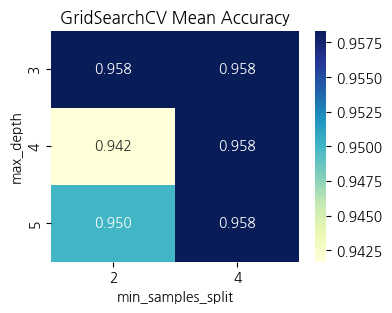

In [19]:
pivot_table = results.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_min_samples_split'
)

plt.figure(figsize=(4, 3))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("GridSearchCV Mean Accuracy")
plt.ylabel("max_depth")
plt.xlabel("min_samples_split");

#### 최종 모델 

In [ ]:
# -----------------------------
# 최종모델
# -----------------------------



#### 테스트세트로 최종 테스트

In [ ]:
# -----------------------------
# 최종 테스트
# -----------------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 전체 데이터로 최종모델 재학습(선택적)